In [47]:
import numpy as np
import pandas as pd
import linearmodels
import matplotlib.pyplot as plt
%matplotlib inline

In [214]:
d = 'csv_data/'
labor_force = pd.read_csv(d + 'civilian_labor_force.csv')
labor_force['DATE'] = pd.to_datetime(labor_force['DATE'])

df1 = pd.read_csv(d+ 'midland_employee_total_count.csv')
df1 = df1.set_index(['Year']).stack().reset_index()
df1 = df1[df1.level_1 != 'Annual']
date = df1['Year'].astype(str) + ' '+ df1['level_1']
df1['Date'] = pd.to_datetime(date)
df1['Employment'] = df1[[0]]
total_employees = df1.drop(columns=['Year', 'level_1', 0])

mining_employment =  pd.read_csv(d + 'midland_mining_employment_thousands_of_people_per_year.csv')
df2 = mining_employment.set_index(['Year']).stack().reset_index()
df2 = df2[df2.level_1 != 'Annual']
date = df2['Year'].astype(str) + ' '+ df2['level_1']
df2['Date'] = pd.to_datetime(date)
df2['MineEmploy'] = df2[[0]]
df2['MineEmploy'] *= 1000
mining_employment = df2.drop(columns=['Year', 'level_1', 0])

unemployment_rate = pd.read_csv(d +'unemployment_rate_midland_tx_by_year.csv')
df3 = unemployment_rate.set_index(['Year']).stack().reset_index()
df3 = df3[df3.level_1 != 'Annual']
date = df3['Year'].astype(str) + ' '+ df3['level_1']
df3['Date'] = pd.to_datetime(date)
df3.replace('x', '0', inplace=True)
# df[50] = (unemployment_rate.loc[45:49].mean() + unemployment_rate.loc[51:55].mean()) / 2
df3.replace('   ', '3.71', inplace=True)
df3['Rate'] = df3[[0]]
df3['Rate'] = df3.Rate.astype(float)
df3['Rate'] /= 100
df3['Region'] = "Midland"
unemployment_rate = df3.drop(columns=['Year', 'level_1', 0])

df4 = pd.read_csv(d +'unemployment_rate.csv')
df4['NationalRate'] = df4.UNRATE.astype(float)/100
df4['Date'] =pd.to_datetime(df4['DATE'])
df4['Region'] = "National"
unemployment_rate_nat = df4.drop(columns=['DATE', 'UNRATE'])


oil_price = pd.read_csv(d + 'WTI_Oil.csv')
oil_price['Date'] = pd.to_datetime(oil_price['Date'])
oil_price['RollingMean'] = oil_price['Price'].rolling(100).mean()

In [215]:
unemployment_rate_nat.head()

,NationalRate,Date,Region
0,0.034,1948-01-01,National
1,0.038,1948-02-01,National
2,0.040,1948-03-01,National
3,0.039,1948-04-01,National
4,0.035,1948-05-01,National


In [216]:
mining_employment.head()

,Date,MineEmploy
0,2009-01-01,16800.0
1,2009-02-01,16200.0
2,2009-03-01,15700.0
3,2009-04-01,15100.0
4,2009-05-01,14700.0


In [217]:
unemployment_rate.head()

,Date,Rate,Region
0,2009-01-01,0.000,Midland
1,2009-02-01,0.040,Midland
2,2009-03-01,0.044,Midland
3,2009-04-01,0.045,Midland
4,2009-05-01,0.057,Midland


In [218]:
mp = oil_price.merge(unemployment_rate, on='Date').merge(mining_employment, on='Date').merge(total_employees, on='Date').merge(labor_force, left_on='Date', right_on='DATE').merge(unemployment_rate_nat, left_on='Date', right_on='Date').sort_values('Date').sort_values('Date')
mp.head()

,Date,Price,Open,High,Low,Vol.,Change %,RollingMean,Rate,Region_x,MineEmploy,Employment,DATE,TXMIDL9LFN,NationalRate,Region_y
68,2010-06-01,72.58,73.97,75.33,71.64,438.59K,-1.88%,76.8473,0.062,Midland,16000.0,67650.0,2010-06-01,71271,0.094,National
67,2010-07-01,72.95,75.37,75.40,72.05,405.08K,-3.54%,78.6886,0.060,Midland,16200.0,67436.0,2010-07-01,72057,0.094,National
66,2010-09-01,73.91,71.70,74.48,71.67,396.61K,2.77%,83.9261,0.055,Midland,16400.0,68297.0,2010-09-01,72494,0.095,National
65,2010-10-01,81.58,79.84,81.75,79.70,359.94K,2.01%,86.5977,0.053,Midland,16700.0,69269.0,2010-10-01,72676,0.094,National
64,2010-11-01,82.95,81.45,83.86,81.32,358.54K,1.87%,90.7384,0.055,Midland,16800.0,69593.0,2010-11-01,72986,0.098,National


In [219]:
img = 'images/'

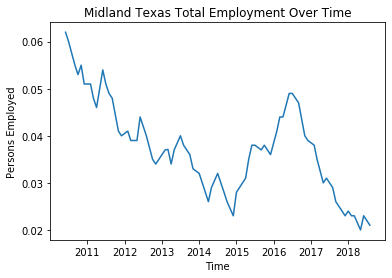

In [220]:
plt.plot(mp.Date, mp.Rate)
plt.title('Midland Texas Total Employment Over Time')
plt.xlabel('Time')
plt.ylabel('Persons Employed');
plt.savefig(img + 'employment_over_time.png')

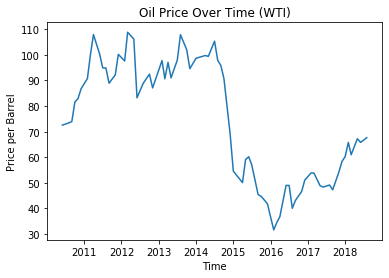

In [221]:
plt.plot(mp.Date, mp.Price)
plt.title('Oil Price Over Time (WTI)')
plt.xlabel('Time')
plt.ylabel('Price per Barrel');
plt.savefig(img + 'oil_price_over_time.png');

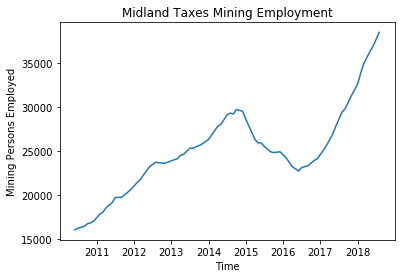

In [222]:
plt.plot(mp.Date, mp.MineEmploy)
plt.title('Midland Taxes Mining Employment')
plt.xlabel('Time')
plt.ylabel('Mining Persons Employed');
plt.savefig(img + 'mining_employment_over_time.png');

In [223]:
max(mp.Employment[20:60]), min(mp.Employment[20:60]), max(mp.MineEmploy[20:60]), min(mp.MineEmploy[20:60])

(94855.0, 81915.0, 29700.0, 22700.0)

In [224]:
max(mp.Price[20:60]), min(mp.Price[20:60])

(107.89, 31.62)

In [225]:
array_of_samples = []
for i in range(10):
    monte_carlo_data = np.zeros_like(mp.Price)
    sim_returns = np.random.normal(1, 12*np.sqrt(np.std((mp.Price/mp.Price.shift(1))[1:] - 1)/252), len(mp.Price))
    monte_carlo_data[0] = mp.Price.values[0]
    for i in range(1, len(mp.Price)):
        monte_carlo_data[i] = monte_carlo_data[i - 1] * sim_returns[i]
    array_of_samples.append(np.array(monte_carlo_data))
    

In [226]:
array_of_samples;

In [227]:
cr = mp[mp.Date > '2014-06-01']
pc = mp[mp.Date < '2014-06-01']
c = mp.query("Date < '2016-09-01' and Date > '2014-09-01'")

In [228]:
price_dt = mp.Price.shift(1) - mp.Price
employ_dt = mp.Employment.shift(1) - mp.Employment
mine_dt = cr.MineEmploy.shift(1) - cr.MineEmploy

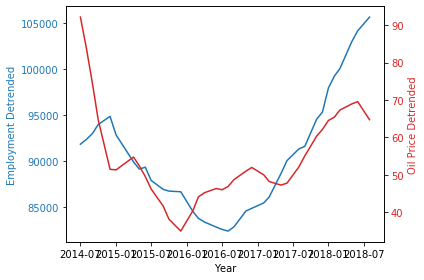

In [229]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Employment Detrended', color=color)
ax1.plot(cr.Date,  cr.Employment, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Oil Price Detrended', color=color)  # we already handled the x-label with ax1
ax2.plot(cr.Date, cr.RollingMean, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

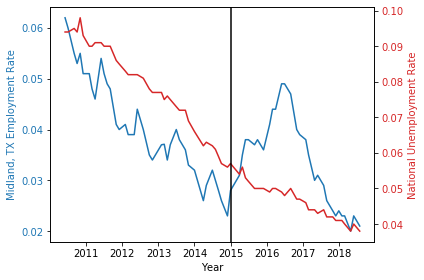

In [230]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Midland, TX Employment Rate', color=color)
ax1.plot(mp.Date, mp.Rate, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('National Unemployment Rate', color=color)  # we already handled the x-label with ax1
ax2.plot(mp.Date, mp.NationalRate, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax2.axvline(x="2015", color='black', label='Oil hits $53 a barrel, from $115 6 months earlier')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(img + 'national_umeployment_versus_midland.png')
plt.show()

In [231]:
sample_corr = np.corrcoef(cr.Employment, cr.Price)[0][1]
sample_corr

0.5260938092479764

In [232]:
array_of_samples = []
for i in range(10000):
    monte_carlo_data = np.zeros_like(mp.Price)
    sim_returns = np.random.normal(1, np.std((mp.Price/mp.Price.shift(-1))[1:] - 1), len(mp.Price))
    monte_carlo_data[0] = mp.Price.values[0]
    random_crash_day = int(np.random.uniform(1, len(mp.Price)))
    for i in range(1, len(mp.Price)):
        if i == random_crash_day:
            crash_multiplier = np.random.uniform(.4, .85)
            monte_carlo_data[i] = monte_carlo_data[i - 1] * crash_multiplier
        else:
            monte_carlo_data[i] = monte_carlo_data[i - 1] * sim_returns[i]
    array_of_samples.append(np.array(monte_carlo_data))
corrs = np.array([])
for arr in array_of_samples:
    corr = np.corrcoef(arr, mp.MineEmploy)[0][1]
    corrs = np.append(corrs, corr)
# this where you can compare base case to what we've observed
sample_corr = np.corrcoef(c.Price[1:], c.MineEmploy.shift(1)[1:])[0][1]
np.sum(corrs > sample_corr)/len(corrs)

0.0305

In [233]:
nat_rate = unemployment_rate_nat.rename(columns={"NationalRate":"Rate"})
regression = unemployment_rate.append(nat_rate[nat_rate.Date > "2010-06-01"]).merge(oil_price[["Date", "RollingMean"]], on='Date')
regression = regression[regression.RollingMean > 0]
regression["Treatment"] = regression.Region == 'Midland'
regression["Treatment"] = regression["Treatment"].astype(int)
regression["Post"] = regression.Date > "2014" 
regression["Post"] = regression["Post"].astype(int)
regression["PostTreatment"] = regression["Treatment"] * regression["Post"]
regression["Constant"] = 1

In [234]:
regression

,Date,Rate,Region,RollingMean,Treatment,Post,PostTreatment,Constant
0,2010-06-01,0.062,Midland,76.8473,1,0,0,1
1,2010-07-01,0.060,Midland,78.6886,1,0,0,1
2,2010-07-01,0.094,National,78.6886,0,0,0,1
3,2010-09-01,0.055,Midland,83.9261,1,0,0,1
4,2010-09-01,0.095,National,83.9261,0,0,0,1
...,...,...,...,...,...,...,...,...
136,2018-08-01,0.038,National,64.7475,0,1,0,1
137,2018-10-01,0.020,Midland,56.6784,1,1,1,1
138,2018-10-01,0.038,National,56.6784,0,1,0,1
139,2018-11-01,0.019,Midland,53.4701,1,1,1,1


In [235]:
import statsmodels.api as sm
X = regression[["Treatment", "Post", "PostTreatment", "Constant"]]
model = sm.OLS(regression.Rate, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rate   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     227.1
Date:                Fri, 08 May 2020   Prob (F-statistic):           5.76e-53
Time:                        20:19:44   Log-Likelihood:                 477.23
No. Observations:                 141   AIC:                            -946.5
Df Residuals:                     137   BIC:                            -934.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Treatment        -0.0394      0.002    -18.473

In [242]:
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

stargazer = Stargazer([results])
stargazer.render_html()

'<table style="text-align:center"><tr><td colspan="2" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left"></td><td colspan="1"><em>Dependent variable:</em></td></tr><tr><td style="text-align:left"></td><tr><td style="text-align:left"></td><td>(1)</td></tr><tr><td colspan="2" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">Constant</td><td>0.083<sup>***</sup></td></tr><tr><td style="text-align:left"></td><td>(0.002)</td></tr><tr><td style="text-align:left">Post</td><td>-0.035<sup>***</sup></td></tr><tr><td style="text-align:left"></td><td>(0.002)</td></tr><tr><td style="text-align:left">PostTreatment</td><td>0.023<sup>***</sup></td></tr><tr><td style="text-align:left"></td><td>(0.003)</td></tr><tr><td style="text-align:left">Treatment</td><td>-0.039<sup>***</sup></td></tr><tr><td style="text-align:left"></td><td>(0.002)</td></tr><td colspan="2" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align: left">

\begin{table} \centering\n  \\label{}\n\\begin{tabular}{@{\\extracolsep{5pt}}lcc}\n\\\\[-1.8ex]\\hline\n\\hline \\\\[-1.8ex]\n& \\multicolumn{1}{c}{\\textit{Dependent variable:}} \\\n\\cr \\cline{1-2}\n\\\\[-1.8ex] & (1) \\\\\n\\hline \\\\[-1.8ex]\n Constant & 0.083$^{***}$ \\\\\n  & (0.002) \\\\\n  & \\\\\n Post & -0.035$^{***}$ \\\\\n  & (0.002) \n  & \\\\\n PostTreatment & 0.023$^{***}$ \\\\\n  & (0.003) \\\\\n  & \\\\\n Treatment & -0.039$^{***}$ \\\\\n  & (0.002) \\\\\n  & \\\\\n\\hline \\\\[-1.8ex]\n Observations & 141.0 \\\\\n R${2}$ & 0.833 \\\\\n Adjusted R${2}$ & 0.829 \\\\\n Residual Std. Error & 0.008(df = 137.0)  \\\\\n F Statistic & 227.134$^{***}$ (df = 3.0; 137.0) \\\\\n\\hline\n\\hline \\\\[-1.8ex]\n\\textit{Note:} & \\multicolumn{1}{r}{$^{*}$p$<$0.1; $^{**}$p$<$0.05; $^{***}$p$<$0.01} \\\\\n\\end{tabular}\n\\end{table}